<a href="https://colab.research.google.com/github/gkarthick510/Project/blob/main/Oneline_payment_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datascience_guvi_dataset-20221117T134551Z-001/onlinefraud.csv')
data.drop('isFlaggedFraud', axis=1, inplace=True)
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0


In [ ]:
data.drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [ ]:
len(data)

6362620

In [ ]:
data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
4178696,304,PAYMENT,1615.63,C1928078601,16297.12,14681.49,M1368652705,0.00,0.00,0
2862905,227,TRANSFER,166115.52,C2019420585,10852.00,0.00,C1827851088,250774.69,416890.21,0
4873166,348,PAYMENT,57191.90,C2053929219,309091.43,251899.53,M1740829836,0.00,0.00,0
5235553,371,CASH_IN,127928.13,C213301083,9714883.71,9842811.84,C25782421,3860340.84,3732412.71,0
5033175,354,PAYMENT,5083.07,C1016038005,8543.00,3459.93,M485064304,0.00,0.00,0


In [ ]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
for col in data.columns:
  if data[col].dtype == 'float64':
    data[col] = pd.to_numeric(data[col], downcast = 'float')
  if data[col].dtype == 'int64':
    data[col] = pd.to_numeric(data[col], downcast = 'unsigned')

data['type'] = data['type'].astype('category')

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,4)

In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


# **Data Vizualisation**

In [ ]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

* There are 743 steps and each step has at least 2 occurence



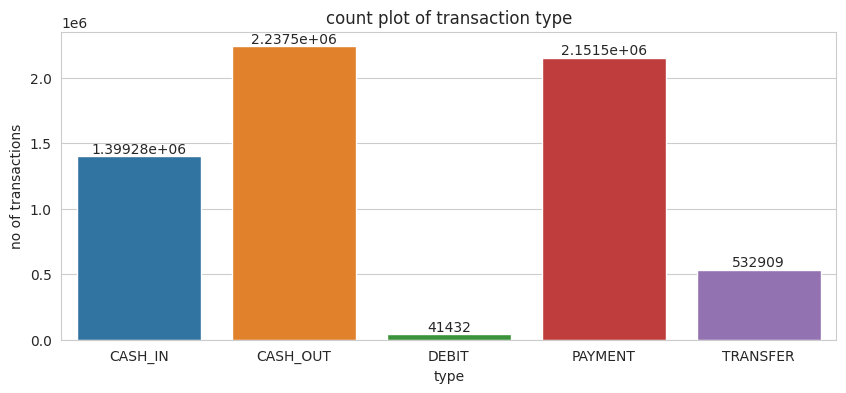

In [ ]:
ax = sns.countplot(x='type', data=data)

for i in ax.containers:
  ax.bar_label(i)

plt.title('count plot of transaction type')
plt.ylabel('no of transactions')
plt.show()

* Cash out is the most numerous transaction type followed by Payment, Cash in, Transfer, Debit type

Text(0.5, 1.0, 'Distribtion of transaction amount')

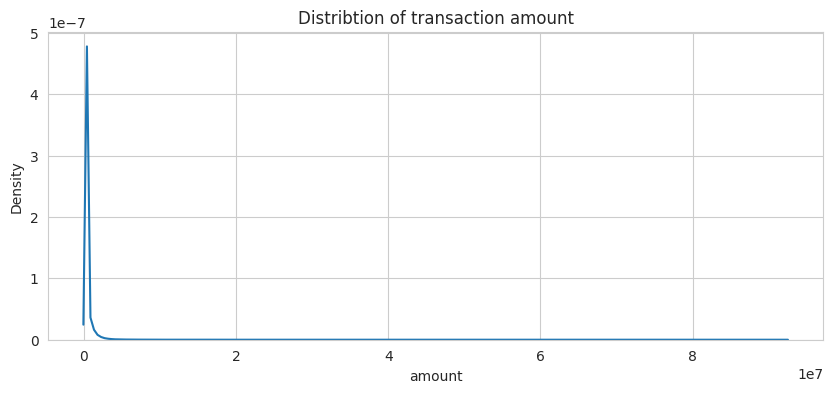

In [ ]:
sns.kdeplot(x='amount', data=data)
plt.title('Distribtion of transaction amount')

* Distribution of transaction amount is right skewed
* Most values are clustered around the left tail of the distribution while the right tail of the distribution is longer
* mode<median<mean

In [ ]:
data.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

Text(0.5, 1.0, 'Distribution of oldbalanceOrg')

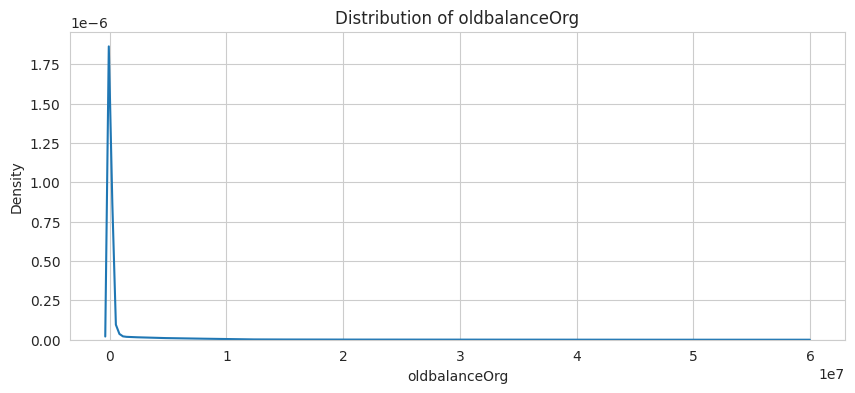

In [ ]:
sns.kdeplot(data.oldbalanceOrg)
plt.title('Distribution of oldbalanceOrg')

* The distribution of pre-transaction balances of the initial customers is right skewed.

In [ ]:
data.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

Text(0.5, 1.0, 'Distribution of newbalanceOrg')

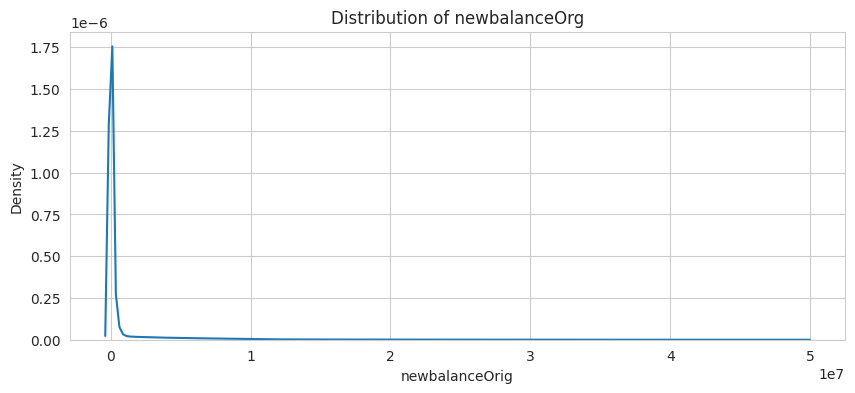

In [ ]:
sns.kdeplot(data.newbalanceOrig)
plt.title('Distribution of newbalanceOrg')

* The distribution of post transaction balances of the initial customers is right skewed.

Text(0.5, 1.0, 'Distribution of oldbalance at receiver end before transaction')

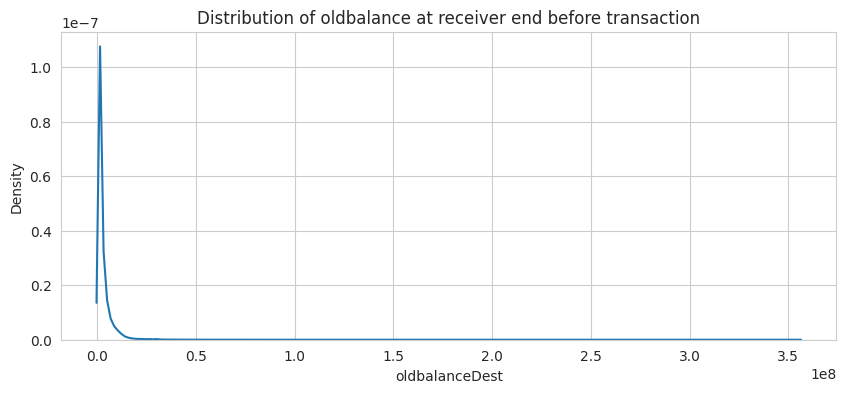

In [ ]:
sns.kdeplot(data.oldbalanceDest)
plt.title('Distribution of oldbalance at receiver end before transaction')

* The distribution of pre-transaction balances of the  recipient is right skewed.

Text(0.5, 1.0, 'Distribution of newbalance at receiver end after transaction')

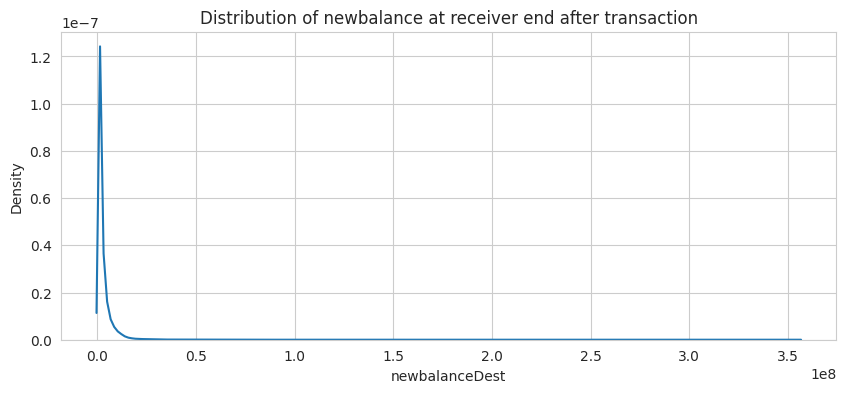

In [ ]:
sns.kdeplot(data.newbalanceDest)
plt.title('Distribution of newbalance at receiver end after transaction')

* The distribution of post-transaction balances of the  recipient is right skewed.

In [ ]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

* There are more non fradulent transacation then the fradulent

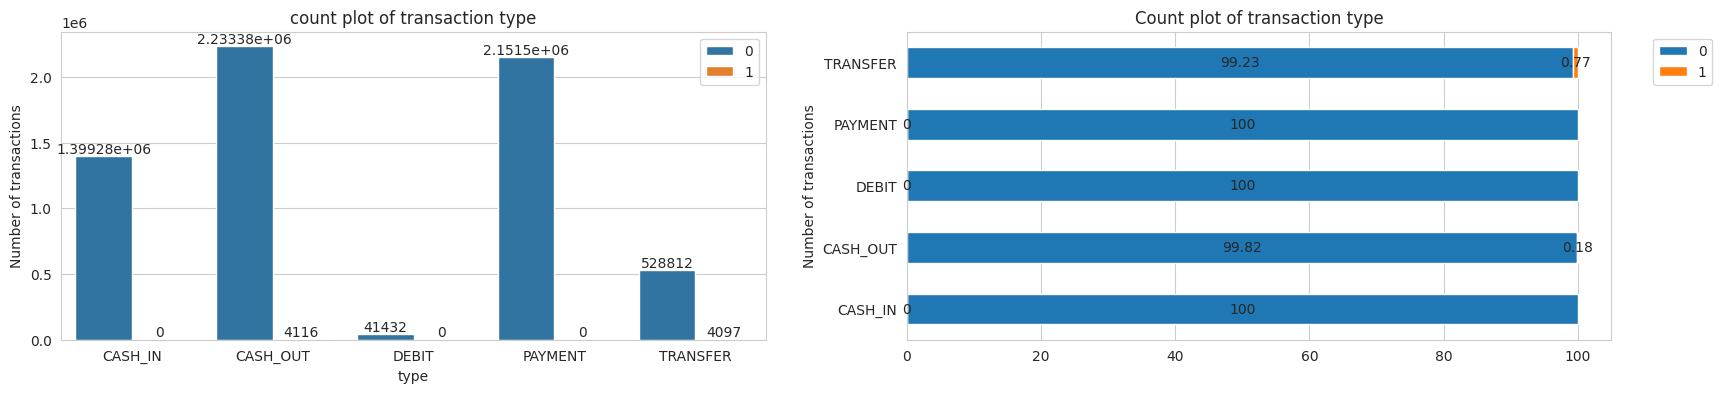

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20,4))
sns.countplot(x='type', hue='isFraud', data=data, ax=ax[0])

for i in ax[0].containers:
  ax[0].bar_label(i)
ax[0].set_title('count plot of transaction type')
ax[0].set_ylabel('Number of transactions')
ax[0].legend(loc='best')

df2 = data.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

* Fradulent transaction occures only in cash out and transfer types

Text(0, 0.5, 'Number of transactions')

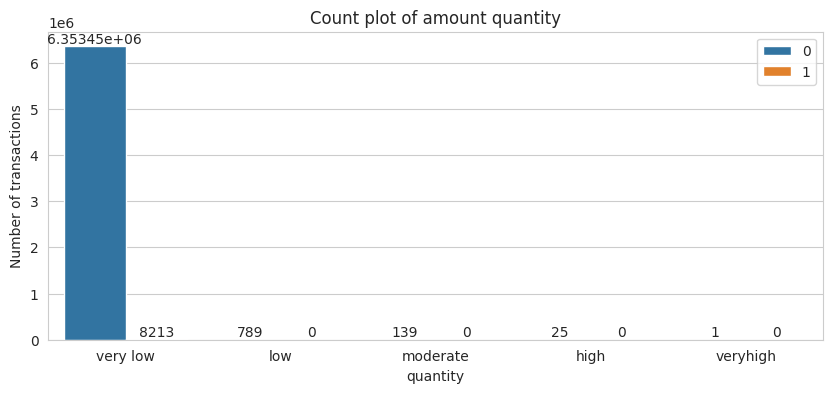

In [ ]:
data['quantity'] = pd.cut(data.amount, 5, labels=['very low','low', 'moderate','high','veryhigh'])
ax = sns.countplot(x=data['quantity'], data=data, hue = 'isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(loc='upper right')
plt.ylabel('Number of transactions')

* All fraudulent transactions fall into the category of very low amounts.
* This suggests that in most cases, small transactions are more prone to fraudulent transactions.

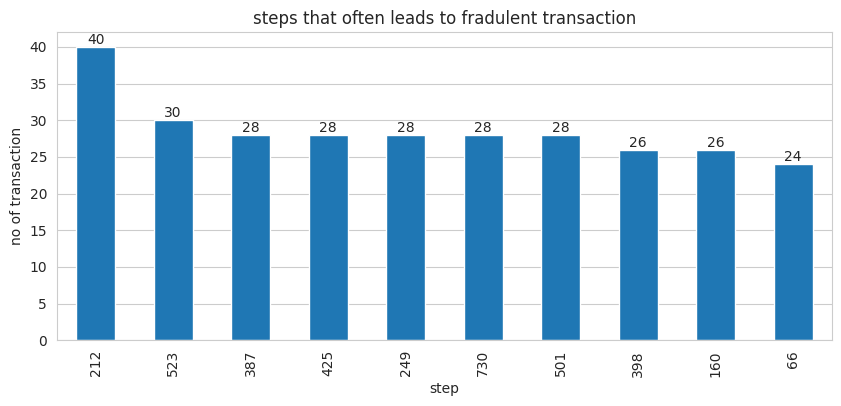

In [ ]:
df = data[data.isFraud==1]
df1 = df.step.value_counts().head(10)
ax = df1.plot(kind='bar')

for i in ax.containers:
  ax.bar_label(i)

plt.title('steps that often leads to fradulent transaction')
plt.ylabel('no of transaction')
plt.xlabel('step')
plt.grid(axis='x')

* step 212 has most no of fradulent transaction

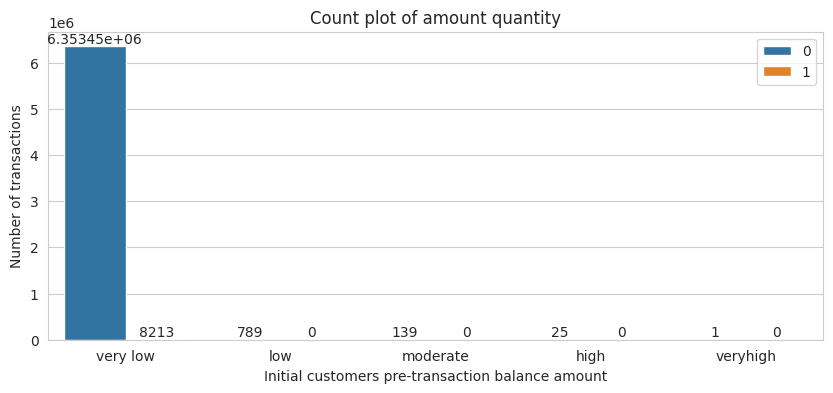

In [ ]:
data['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low','low', 'moderate','high','veryhigh'])
ax = sns.countplot(x=data['quantity'], data=data, hue = 'isFraud')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(loc='upper right')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')
plt.show()


* Initial customers with very low pre-transaction balances has the highest number of fraudulent transactions. 

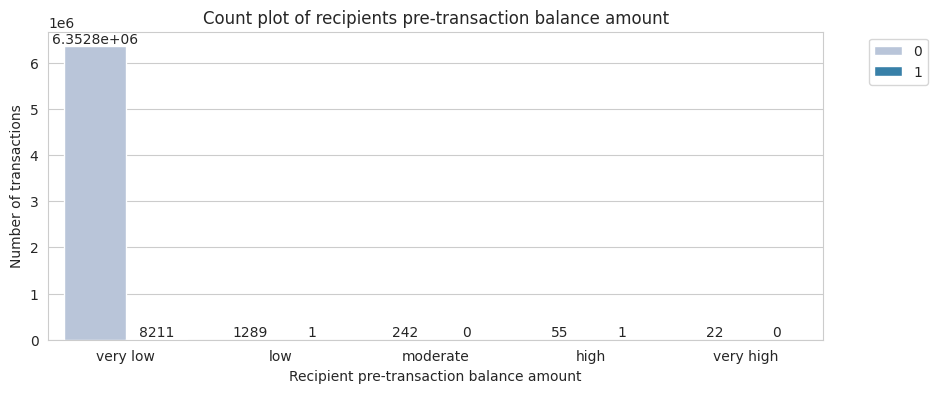

In [ ]:
data['oldbalanceDest_amt'] = pd.cut(data['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=data, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')
plt.show()


* Recipients with very low pre-transaction balances has the highest number of fraudulent transactions. 

<ipython-input-27-6beab369fe47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='PuBu', annot = True  )


Text(0.5, 1.0, 'Correlation')

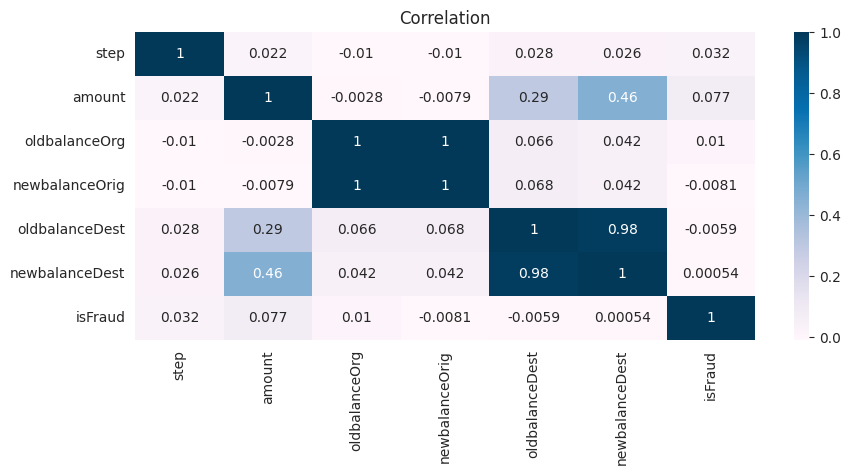

In [ ]:
sns.heatmap(data.corr(), cmap='PuBu', annot = True  )
plt.title('Correlation')

* oldbalanceOrg and newbalanceOrig has strong positive relationship.
* oldbalanceDest and newbalanceDest has strong positive relationship.

# **Model Building**

In [ ]:
new_data = pd.get_dummies(data.type, drop_first=True)
data_new = pd.concat([data, new_data], axis=1)
data_new.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,very low,NaN,very low,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,very low,NaN,very low,0,0,1,0


In [ ]:
X= data_new.drop(['type', 'isFraud', 'nameOrig','nameDest','quantity','oldbalanceDest_amt','oldbalanceOrg_amt'], axis=1)
y= data_new.isFraud
print(X.shape, y.shape)

(6362620, 10) (6362620,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score as ras, roc_curve, auc


In [ ]:
skfold =  StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_ind, test_ind in skfold.split(X,y):
  x_train, x_test = X.iloc[train_ind], X.iloc[test_ind]
  y_train, y_test = y.iloc[train_ind], y.iloc[test_ind]  


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5090096, 10), (1272524, 10), (5090096,), (1272524,))

In [ ]:
sc = StandardScaler()
scaled_xtrain = sc.fit_transform(x_train)
scaled_xtest = sc.transform(x_test)

x_train = pd.DataFrame(scaled_xtrain, index= x_train.index, columns= x_train.columns)
x_test = pd.DataFrame(scaled_xtest, index= x_test.index, columns= x_test.columns)

In [ ]:
x_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(x_train, y_train)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13140, 10), (1272524, 10), (13140,), (1272524,))

In [ ]:
models = { 'LogisticRegression': LogisticRegression(max_iter= 120), 'SVC': SVC(), 'RandomForestClassifier': RandomForestClassifier( criterion= 'entropy'),
          'XGBClassifier': XGBClassifier() }

In [ ]:
def model_comparison_eval (models, x,y):

  for name, model in models.items():
    print('{}:'.format(name))
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    for score in scoring:
      scores= cross_val_score(model, x, y, scoring= score, cv= skfold )
      print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
    print('\n')

In [ ]:
model_comparison_eval (models, x_train,y_train)

LogisticRegression:
Mean accuracy score: 0.923 (0.002)
Mean precision score: 0.930 (0.004)
Mean recall score: 0.915 (0.007)
Mean f1 score: 0.923 (0.002)
Mean roc_auc score: 0.980 (0.002)


SVC:
Mean accuracy score: 0.905 (0.002)
Mean precision score: 0.957 (0.004)
Mean recall score: 0.848 (0.003)
Mean f1 score: 0.899 (0.003)
Mean roc_auc score: 0.969 (0.001)


RandomForestClassifier:
Mean accuracy score: 0.992 (0.001)
Mean precision score: 0.988 (0.003)
Mean recall score: 0.997 (0.001)
Mean f1 score: 0.992 (0.001)
Mean roc_auc score: 0.999 (0.000)


XGBClassifier:
Mean accuracy score: 0.994 (0.001)
Mean precision score: 0.991 (0.003)
Mean recall score: 0.997 (0.001)
Mean f1 score: 0.994 (0.001)
Mean roc_auc score: 0.999 (0.000)




In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test) 
y_pred_prob = model.predict_proba(x_test)[:,1]
print('XGBCLASSIFIER : ')
print(classification_report( y_test, y_pred))

XGBCLASSIFIER : 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.12      1.00      0.22      1643

    accuracy                           0.99   1272524
   macro avg       0.56      0.99      0.61   1272524
weighted avg       1.00      0.99      0.99   1272524



In [ ]:
cm =confusion_matrix(y_test, y_pred)
cm

array([[1259039,   11842],
       [      6,    1637]])

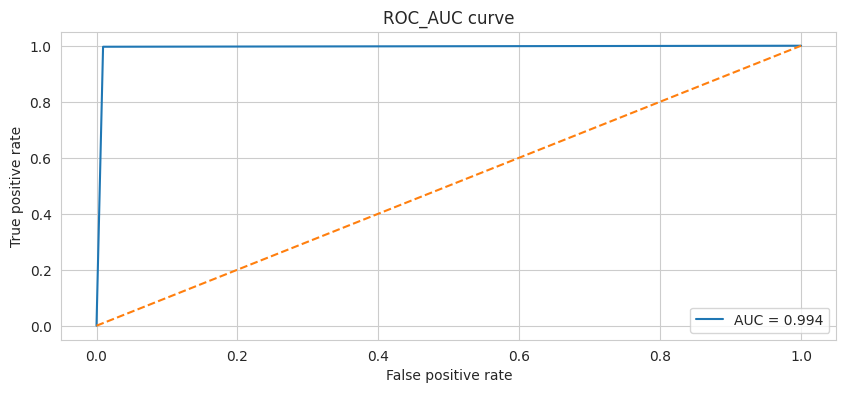

In [ ]:
fpr,tpr, thresold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr, label = 'AUC = %0.3f' % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.title('ROC_AUC curve')
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

* XGBClassifier obtains the highest score of all using K-fold cross-validation.
* The best performing model is XGBClassifier for identifying fraudulent and non-fraudulent payments, as the AUC is 0.999, which is close to 1.  This means it has a good separability measure, and the model has an 99.9% chance of being able to distinguish between positive and negative classes